# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ALGO1-:-Introduction-à-l'algorithmique" data-toc-modified-id="ALGO1-:-Introduction-à-l'algorithmique-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://perso.crans.org/besson/teach/info1_algo1_2019/" target="_blank">ALGO1 : Introduction à l'algorithmique</a></a></div><div class="lev1 toc-item"><a href="#Cours-Magistral-9" data-toc-modified-id="Cours-Magistral-9-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cours Magistral 9</a></div><div class="lev2 toc-item"><a href="#Documentation-de-scipy.opt.linprog" data-toc-modified-id="Documentation-de-scipy.opt.linprog-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Documentation de <code>scipy.opt.linprog</code></a></div><div class="lev2 toc-item"><a href="#Fonction-de-débogage" data-toc-modified-id="Fonction-de-débogage-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fonction de débogage</a></div><div class="lev2 toc-item"><a href="#Premier-exemple" data-toc-modified-id="Premier-exemple-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Premier exemple</a></div><div class="lev2 toc-item"><a href="#Second-exemple" data-toc-modified-id="Second-exemple-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Second exemple</a></div><div class="lev3 toc-item"><a href="#Essayons-avec-différentes-méthodes-de-résolution-:" data-toc-modified-id="Essayons-avec-différentes-méthodes-de-résolution-:-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Essayons avec différentes méthodes de résolution :</a></div><div class="lev4 toc-item"><a href="#Avec-la-méthode-du-simplexe" data-toc-modified-id="Avec-la-méthode-du-simplexe-2411"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Avec la méthode du simplexe</a></div><div class="lev4 toc-item"><a href="#Avec-la-méthode-du-simplexe" data-toc-modified-id="Avec-la-méthode-du-simplexe-2412"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Avec la méthode du simplexe</a></div><div class="lev2 toc-item"><a href="#Bonus-:-implémentation-manuelle-de-l'algorithme-du-simplexe" data-toc-modified-id="Bonus-:-implémentation-manuelle-de-l'algorithme-du-simplexe-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Bonus : implémentation manuelle de l'algorithme du simplexe</a></div><div class="lev3 toc-item"><a href="#Algorithme" data-toc-modified-id="Algorithme-251"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Algorithme</a></div><div class="lev3 toc-item"><a href="#Conversion-en-forme-standard" data-toc-modified-id="Conversion-en-forme-standard-252"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Conversion en forme standard</a></div><div class="lev3 toc-item"><a href="#Utilitaires-pour-les-matrices" data-toc-modified-id="Utilitaires-pour-les-matrices-253"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Utilitaires pour les matrices</a></div><div class="lev3 toc-item"><a href="#L'algorithme-du-simplexe" data-toc-modified-id="L'algorithme-du-simplexe-254"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>L'algorithme du simplexe</a></div><div class="lev3 toc-item"><a href="#Un-premier-exemple" data-toc-modified-id="Un-premier-exemple-255"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Un premier exemple</a></div><div class="lev3 toc-item"><a href="#Tests" data-toc-modified-id="Tests-256"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Tests</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion</a></div>

# [ALGO1 : Introduction à l'algorithmique](https://perso.crans.org/besson/teach/info1_algo1_2019/)

- [Page du cours](https://perso.crans.org/besson/teach/info1_algo1_2019/) : https://perso.crans.org/besson/teach/info1_algo1_2019/
- Magistère d'Informatique de Rennes - ENS Rennes - Année 2019/2020
- Intervenants :
  + Cours : [Lilian Besson](https://perso.crans.org/besson/)
  + Travaux dirigés : [Raphaël Truffet](http://perso.eleves.ens-rennes.fr/people/Raphael.Truffet/)
- Références :
  + [Open Data Structures](http://opendatastructures.org/ods-python.pdf)

# Cours Magistral 9

- Ce cours traite de programmation linéaire.

- On va illustrer deux programmes linéaires résolus avec la fonction `scipy.optimize.linprog`.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.optimize as opt

## Documentation de `scipy.opt.linprog`

In [2]:
help(opt.linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='interior-point', callback=None, options=None, x0=None)
    Linear programming: minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear programming solves problems of the following form:
    
    .. math::
    
        \min_x \ & c^T x \\
        \mbox{such that} \ & A_{ub} x \leq b_{ub},\\
        & A_{eq} x = b_{eq},\\
        & l \leq x \leq u ,
    
    where :math:`x` is a vector of decision variables; :math:`c`,
    :math:`b_{ub}`, :math:`b_{eq}`, :math:`l`, and :math:`u` are vectors; and
    :math:`A_{ub}` and :math:`A_{eq}` are matrices.
    
    Informally, that's:
    
    minimize::
    
        c @ x
    
    such that::
    
        A_ub @ x <= b_ub
        A_eq @ x == b_eq
        lb <= x <= ub
    
    Note that by default ``lb = 0`` and ``ub = None`` unless specified with
    ``bou

La programmation linéaire résout des problèmes de la forme suivante :

$$
\begin{align}
\min_x \ & c^T x \\
\mbox{such that} \ & A_{ub} x \leq b_{ub},\\
& A_{eq} x = b_{eq},\\
& l \leq x \leq u ,
\end{align}
$$

avec $x$ un vecteur de variables de décisions ; $c$, $b_{ub}$, $b_{eq}$, $l$, et $u$ sont des vecteurs ; $A_{ub}$ et $A_{eq}$ sont des matrices.

## Fonction de débogage

In [60]:
def make_callback():
    list_of_x, list_of_fun = [], []
    def debug_callback(opt_res):
        print("\nA new optimization step gave:")
        print(f"Current solution x = {opt_res.x}")
        list_of_x.append(opt_res.x)
        print(f"Current value of c @ x = {opt_res.fun}")
        list_of_fun.append(opt_res.fun)
        print(f"Success? = {opt_res.success}")
        print(f"The (nominally positive) values of the slack, b_ub - A_ub @ x. = {opt_res.slack}")
        print(f"The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = {opt_res.con}")
        print(f"Algorithm in phase {opt_res.phase}")
        print(f"Algorithm in iteration number {opt_res.nit}")
        status = {
            0: "Optimization proceeding nominally.",
            1: "Iteration limit reached.",
            2: "Problem appears to be infeasible.",
            3: "Problem appears to be unbounded.",
            4: "Numerical difficulties encountered.",
        }
        print(f"Algorithm status {status[opt_res.status]}")
        if opt_res.message: print(f"Algorithm message: {opt_res.message}")
    return list_of_x, list_of_fun, debug_callback

## Premier exemple

On va suivre l'exemple détaillé en cours :

- Variables
  + $x$ nombre de tables fabriquées par semaine,
  + $y$ nombre de chaises fabriquées par semaine.

- Objectif :
  + maximiser $30x + 10y$.

- Contraintes :
  + heures de travail : $6x+3y \leq 36$,
  + demande : $y \geq 3x$,
  + stockage : $x + y/4 \leq 4$,
  + positivité : $x \geq 0$,
  + positivité : $y \geq 0$.

Mise sous la forme requise par la fonction `linprog`, cela va donner :

$$
\begin{align}
\min_{[x, y]} \ & [-30, -10]^T [x, y] \\
\mbox{such that} \ & 
    [
        [6, 3], [-3, 1], [1, 1/4]
    ]
    [x, y]
= [6x + 3y, y - 3x, x + y/4] \leq [36, 0, 4],\\
& [0, 0] \leq [x, y] \leq [+\infty,+\infty] ,
\end{align}
$$

Et donc avec Python cela sera :

In [83]:
c = np.array([-30, -10])

A_ub = np.array([[6, 3], [-3, 1], [1, 1/4]])
b_ub = np.array([36, 0, 4])

A_eq = None
b_eq = None

# all variables are bound to be in (0, +inf)
bounds = (0, None)

Objectif :

In [84]:
import sympy
x, y = sympy.var('x y')

In [85]:
c.T @ [x, y]

-30*x - 10*y

Contraintes d'inéqualités :

In [86]:
A_ub @ [x, y]

array([6.0*x + 3.0*y, -3.0*x + 1.0*y, 1.0*x + 0.25*y], dtype=object)

In [87]:
b_ub

array([36,  0,  4])

Essaysons avec différentes méthodes de résolution :

In [88]:
opt.linprog(c,
            A_ub=A_ub, b_ub=b_ub,
            A_eq=A_eq, b_eq=b_eq,
            bounds=bounds,
            method="simplex",
            callback=debug_callback,
)


A new optimization step gave:
Current solution x = [0. 0.]
Current value of c @ x = 0.0
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [36.  0.  4.]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 0
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [0. 0.]
Current value of c @ x = 0.0
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [36.  0.  4.]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 1
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [2.28571429 6.85714286]
Current value of c @ x = -137.14285714285714
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [1.71428571 0.         0.        ]
The (nominally zer

     con: array([], dtype=float64)
     fun: -137.14285714285714
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1.71428571, 0.        , 0.        ])
  status: 0
 success: True
       x: array([2.28571429, 6.85714286])

In [89]:
x_opt, y_opt = _.x

La solution obtenue est donc $x = 2.28$ et $y = 6.85$, qui donnerait un profit maximal de $+137 €$ par semaine en respectant toutes les contraintes.

Pour obtenir une solution entière, on essaie $x = 2, 3$ et $y = 6, 7$, ie. on arrondit en dessous et au dessus, et on prend la solution qui satisfait les contraintes et maximise l'objectif :

In [90]:
x_opt, y_opt

(2.2857142857142856, 6.857142857142857)

In [103]:
import itertools

In [95]:
sol = None
min_obj = float("+inf")

for (x, y) in itertools.product(
        [np.floor(x_opt), np.ceil(x_opt)],
        [np.floor(y_opt), np.ceil(y_opt)],
    ):
    obj = c.T @ [x, y]
    ctr = (A_ub @ [x, y]) <= b_ub
    print(f"Pour (x, y) = {x, y}, l'objectif vaut {obj}, la contrainte vaut {ctr}")
    if np.all(ctr) and obj < min_obj:
        min_obj = obj
        sol = [x, y]

print(f"==> Donc on utilise la solution entière optimale = {sol}")

Pour (x, y) = (2.0, 6.0), l'objectif vaut -120.0, la contrainte vaut [ True  True  True]
Pour (x, y) = (2.0, 7.0), l'objectif vaut -130.0, la contrainte vaut [ True False  True]
Pour (x, y) = (3.0, 6.0), l'objectif vaut -150.0, la contrainte vaut [ True  True False]
Pour (x, y) = (3.0, 7.0), l'objectif vaut -160.0, la contrainte vaut [False  True False]
==> Donc on utilise la solution entière optimale = [2.0, 6.0]


La solution entière optimale à ce premier problème est donc de fabriquer $x=2$ tables et $y=6$ chaises chaque semaine.

## Second exemple

<img src="figures/CM9_ensemble_admissible.png">

Mise sous la forme requise par la fonction `linprog`, cela va donner :

$$
\begin{align}
\min_{[x, y]} \ & [4, 3]^T [x, y] \\
\mbox{such that} \ & 
    [
        [-1, 4], [1, 1], [3, -1]
    ]
    [x, y]
= [-x + 4y, x + y, 3x - y] \leq [16, 9, 15],\\
& [0, 0] \leq [x, y] \leq [+\infty,+\infty] ,
\end{align}
$$

Et donc avec Python cela sera :

In [54]:
c = np.array([-4, -3])

A_ub = np.array([[-1, 4], [1, 1], [3, -1]])
b_ub = np.array([16, 9, 15])

A_eq = None
b_eq = None

# all variables are bound to be in (0, +inf)
bounds = (0, None)

Objectif :

In [55]:
import sympy
x, y = sympy.var('x y')

In [56]:
c.T @ [x, y]

-4*x - 3*y

Contraintes d'inéqualités :

In [57]:
A_ub @ [x, y]

array([-x + 4*y, x + y, 3*x - y], dtype=object)

In [58]:
b_ub

array([16,  9, 15])

### Essayons avec différentes méthodes de résolution :

#### Avec la méthode du simplexe

In [97]:
list_of_x, list_of_fun, debug_callback = make_callback()

opt.linprog(c,
            A_ub=A_ub, b_ub=b_ub,
            A_eq=A_eq, b_eq=b_eq,
            bounds=bounds,
            method="simplex",
            callback=debug_callback,
)


A new optimization step gave:
Current solution x = [0. 0.]
Current value of c @ x = 0.0
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [36.  0.  4.]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 0
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [0. 0.]
Current value of c @ x = 0.0
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [36.  0.  4.]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 1
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [2.28571429 6.85714286]
Current value of c @ x = -137.14285714285714
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [1.71428571 0.         0.        ]
The (nominally zer

     con: array([], dtype=float64)
     fun: -137.14285714285714
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1.71428571, 0.        , 0.        ])
  status: 0
 success: True
       x: array([2.28571429, 6.85714286])

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, "Valeur de l'objectif étape par étape")

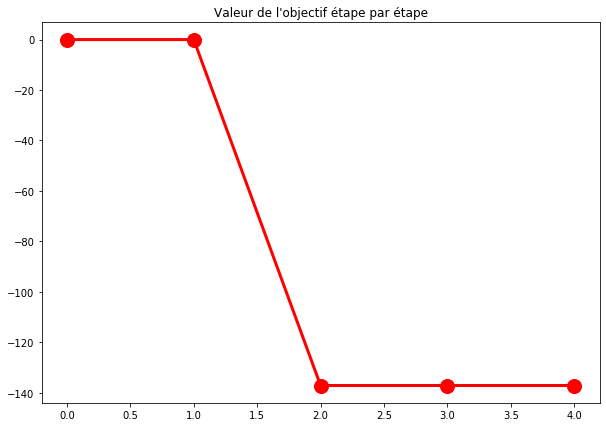

In [98]:
plt.figure(figsize=(10, 7))
plt.title("Valeur de l'objectif étape par étape")
plt.plot(list_of_fun, "ro-", lw=3, ms=14)
plt.show()

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Position des points étape par étape')

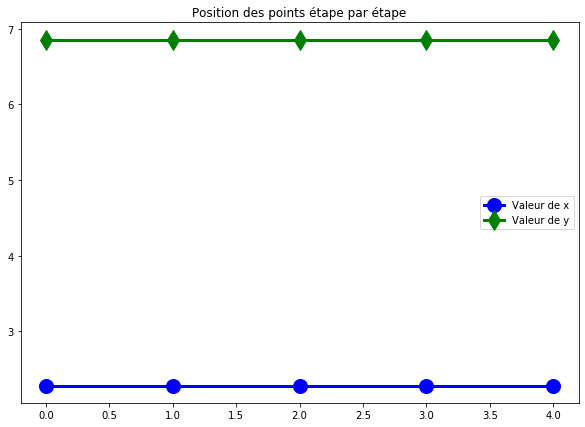

In [99]:
plt.figure(figsize=(10, 7))
plt.title("Position des points étape par étape")
list_of_X, list_of_Y = [x for (x,y) in list_of_x], [y for (x,y) in list_of_x]
# plt.plot(list_of_X, list_of_Y, 'bo-')
plt.plot(list_of_X, 'bo-', label="Valeur de x", lw=3, ms=14)
plt.plot(list_of_Y, 'gd-', label="Valeur de y", lw=3, ms=14)
plt.legend()
plt.show()

#### Avec la méthode du simplexe

In [100]:
list_of_x, list_of_fun, debug_callback = make_callback()

opt.linprog(c,
            A_ub=A_ub, b_ub=b_ub,
            A_eq=A_eq, b_eq=b_eq,
            bounds=bounds,
            method="interior-point",
            callback=debug_callback,
)


A new optimization step gave:
Current solution x = [1. 1.]
Current value of c @ x = -40.0
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [27.    2.    2.75]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 0
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [2.56344769 2.33176838]
Current value of c @ x = -100.2211144395063
Success? = False
The (nominally positive) values of the slack, b_ub - A_ub @ x. = [13.62400873  5.35857468  0.85361022]
The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x. = []
Algorithm in phase 1
Algorithm in iteration number 1
Algorithm status Optimization proceeding nominally.

A new optimization step gave:
Current solution x = [2.24989923 5.93276901]
Current value of c @ x = -126.8246668478194
Success? = False
The (nominally positive) values of the slack, b_ub - A_u

     con: array([], dtype=float64)
     fun: -137.14285704855126
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.71428574e+00, 7.28767979e-09, 2.44693465e-09])
  status: 0
 success: True
       x: array([2.28571429, 6.85714285])

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, "Valeur de l'objectif étape par étape")

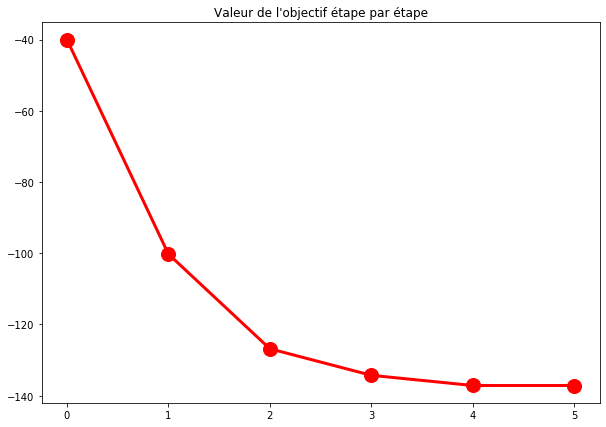

In [101]:
plt.figure(figsize=(10, 7))
plt.title("Valeur de l'objectif étape par étape")
plt.plot(list_of_fun, "ro-", lw=3, ms=14)
plt.show()

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Position des points étape par étape')

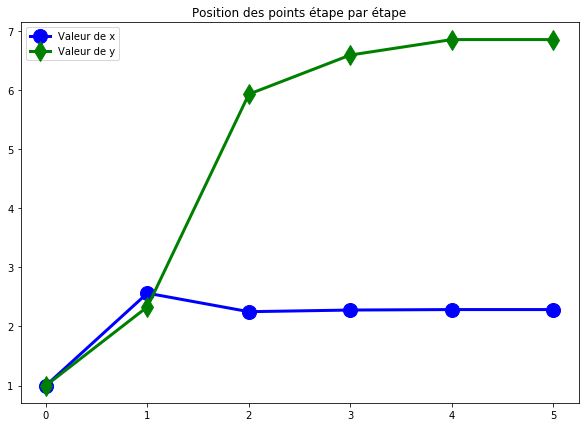

In [102]:
plt.figure(figsize=(10, 7))
plt.title("Position des points étape par étape")
list_of_X, list_of_Y = [x for (x,y) in list_of_x], [y for (x,y) in list_of_x]
# plt.plot(list_of_X, list_of_Y, 'bo-')
plt.plot(list_of_X, 'bo-', label="Valeur de x", lw=3, ms=14)
plt.plot(list_of_Y, 'gd-', label="Valeur de y", lw=3, ms=14)
plt.legend()
plt.show()

----
## Bonus : implémentation manuelle de l'algorithme du simplexe

- Refs : [ce poste de blogue](http://jeremykun.com/2014/12/01/linear-programming-and-the-simplex-algorithm/), [ces notes de cours](http://jeffe.cs.illinois.edu/teaching/algorithms/notes/I-simplex.pdf), et [cet autre poste de blogue](https://medium.com/@jacob.d.moore1/coding-the-simplex-algorithm-from-scratch-using-python-and-numpy-93e3813e6e70).
- Code source venant de : https://github.com/j2kun/simplex-algorithm/

### Algorithme

TODO use numpy arrays?

In [107]:
import heapq

In [108]:
def identity(numRows, numCols, val=1, rowStart=0):
    """ Return a rectangular identity matrix with the specified diagonal entiries, possibly starting in the middle.
    """
    return [
        [
            (val if i == j else 0)
            for j in range(numCols)
        ]
        for i in range(rowStart, numRows)
    ]

### Conversion en forme standard

In [109]:
def standardForm(cost, greaterThans=[], gtThreshold=[], lessThans=[], ltThreshold=[],
                equalities=[], eqThreshold=[], maximization=True):
    """
       standardForm: [float], [[float]], [float], [[float]], [float], [[float]], [float] -> [float], [[float]], [float]
       Convert a linear program in general form to the standard form for the
       simplex algorithm.  The inputs are assumed to have the correct dimensions: cost
       is a length n list, greaterThans is an n-by-m matrix, gtThreshold is a vector
       of length m, with the same pattern holding for the remaining inputs. No
       dimension errors are caught, and we assume there are no unrestricted variables.
    """
    newVars = 0
    numRows = 0
    if gtThreshold != []:
        newVars += len(gtThreshold)
        numRows += len(gtThreshold)
    if ltThreshold != []:
        newVars += len(ltThreshold)
        numRows += len(ltThreshold)
    if eqThreshold != []:
        numRows += len(eqThreshold)

    if not maximization:
        cost = [-x for x in cost]

    if newVars == 0:
        return cost, equalities, eqThreshold

    newCost = list(cost) + [0] * newVars

    constraints = []
    threshold = []

    oldConstraints = [(greaterThans, gtThreshold, -1), (lessThans, ltThreshold, 1),
                     (equalities, eqThreshold, 0)]

    offset = 0
    for constraintList, oldThreshold, coefficient in oldConstraints:
        constraints += [c + r for c, r in zip(constraintList,
             identity(numRows, newVars, coefficient, offset))]

        threshold += oldThreshold
        offset += len(oldThreshold)

    return newCost, constraints, threshold

### Utilitaires pour les matrices

In [110]:
def dot(a, b):
    return sum(x*y for x, y in zip(a, b))

In [111]:
def column(A, j):
    return [row[j] for row in A]

In [112]:
def transpose(A):
    return [column(A, j) for j in range(len(A[0]))]

In [113]:
def isPivotCol(col):
    return (len([c for c in col if c == 0]) == len(col) - 1) and sum(col) == 1

def variableValueForPivotColumn(tableau, column):
    pivotRow = [i for (i, x) in enumerate(column) if x == 1][0]
    return tableau[pivotRow][-1]

In [114]:
# assume the last m columns of A are the slack variables; the initial basis is
# the set of slack variables
def initialTableau(c, A, b):
    tableau = [row[:] + [x] for row, x in zip(A, b)]
    tableau.append([ci for ci in c] + [0])
    return tableau

In [115]:
def primalSolution(tableau):
    # the pivot columns denote which variables are used
    columns = transpose(tableau)
    indices = [j for j, col in enumerate(columns[:-1]) if isPivotCol(col)]
    return [(colIndex, variableValueForPivotColumn(tableau, columns[colIndex]))
            for colIndex in indices]

In [116]:
def objectiveValue(tableau):
    return -(tableau[-1][-1])

In [117]:
def canImprove(tableau):
    lastRow = tableau[-1]
    return any(x > 0 for x in lastRow[:-1])

In [118]:
# this can be slightly faster
def moreThanOneMin(L):
    if len(L) <= 1:
        return False

    x, y = heapq.nsmallest(2, L, key=lambda x: x[1])
    return x == y

In [119]:
def findPivotIndex(tableau):
    # pick minimum positive index of the last row
    column_choices = [(i, x) for (i, x) in enumerate(tableau[-1][:-1]) if x > 0]
    column = min(column_choices, key=lambda a: a[1])[0]

    # check if unbounded
    if all(row[column] <= 0 for row in tableau):
        raise Exception('Linear program is unbounded.')

    # check for degeneracy: more than one minimizer of the quotient
    quotients = [
        (i, r[-1] / r[column])
        for i, r in enumerate(tableau[:-1])
        if r[column] > 0
    ]

    if moreThanOneMin(quotients):
        raise Exception('Linear program is degenerate.')

    # pick row index minimizing the quotient
    row = min(quotients, key=lambda x: x[1])[0]

    return row, column

In [120]:
def pivotAbout(tableau, pivot):
    i, j = pivot

    pivotDenom = tableau[i][j]
    tableau[i] = [x / pivotDenom for x in tableau[i]]

    for k,row in enumerate(tableau):
        if k != i:
            pivotRowMultiple = [y * tableau[k][j] for y in tableau[i]]
            tableau[k] = [x - y for x,y in zip(tableau[k], pivotRowMultiple)]

### L'algorithme du simplexe

In [141]:
def simplex(c, A, b):
    """
    simplex: c: [float], A: [[float]], b: [float] -> [float], float
    Solve the given standard-form linear program:
        max <c, x>
        s.t. Ax = b
             x >= 0
    Providing the optimal solution x* and the value of the objective function.
    """
    tableau = initialTableau(c, A, b)
    print("Initial tableau:")
    for row in tableau:
        print(row)
    print()

    while canImprove(tableau):
        pivot = findPivotIndex(tableau)
        print("Next pivot index is={}\n".format(pivot))
        pivotAbout(tableau, pivot)
        print("Tableau after pivot:")
        for row in tableau:
            print(row)
        print()

    return tableau, primalSolution(tableau), objectiveValue(tableau)

### Un premier exemple

In [142]:
c = [300, 250, 450]
A = [[15, 20, 25], [35, 60, 60], [20, 30, 25], [0, 250, 0]]
b = [1200, 3000, 1500, 500]

# add slack variables by hand
A[0] += [1,0,0,0]
A[1] += [0,1,0,0]
A[2] += [0,0,1,0]
A[3] += [0,0,0,-1]
c += [0,0,0,0]

t, s, v = simplex(c, A, b)
print(s)
print(v)

Initial tableau:
[15, 20, 25, 1, 0, 0, 0, 1200]
[35, 60, 60, 0, 1, 0, 0, 3000]
[20, 30, 25, 0, 0, 1, 0, 1500]
[0, 250, 0, 0, 0, 0, -1, 500]
[300, 250, 450, 0, 0, 0, 0, 0]

Next pivot index is=(3, 1)

Tableau after pivot:
[15.0, 0.0, 25.0, 1.0, 0.0, 0.0, 0.08, 1160.0]
[35.0, 0.0, 60.0, 0.0, 1.0, 0.0, 0.24, 2880.0]
[20.0, 0.0, 25.0, 0.0, 0.0, 1.0, 0.12, 1440.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -0.004, 2.0]
[300.0, 0.0, 450.0, 0.0, 0.0, 0.0, 1.0, -500.0]

Next pivot index is=(1, 6)

Tableau after pivot:
[3.333333333333332, 0.0, 5.0, 1.0, -0.33333333333333337, 0.0, 0.0, 200.0]
[145.83333333333334, 0.0, 250.0, 0.0, 4.166666666666667, 0.0, 1.0, 12000.0]
[2.5, 0.0, -5.0, 0.0, -0.5, 1.0, 0.0, 0.0]
[0.5833333333333334, 1.0, 1.0, 0.0, 0.01666666666666667, 0.0, 0.0, 50.0]
[154.16666666666666, 0.0, 200.0, 0.0, -4.166666666666667, 0.0, 0.0, -12500.0]

Next pivot index is=(2, 0)

Tableau after pivot:
[0.0, 0.0, 11.666666666666664, 1.0, 0.33333333333333315, -1.333333333333333, 0.0, 200.0]
[0.0, 0.0, 54

Et pou comparer avec la réponse donnée par `scipy.optimize.linprog` :

In [148]:
opt_res = opt.linprog(-np.array(c), A_ub=A, b_ub=b, method="simplex")
opt_res

     con: array([], dtype=float64)
     fun: -23400.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([  0.,   0.,   0., 500.])
  status: 0
 success: True
       x: array([ 60.,   0.,  12.,   0., 180.,   0.,   0.])

La solution optimale trouvée par `scipy.optimize.linprog` est meilleure que celle trouvée par notre algorithme.

In [149]:
v, - opt_res.fun

(23060.0, 23400.0)

Notre implémentation donne une solution :

In [151]:
s

[(0, 55.999999999999986),
 (1, 1.999999999999993),
 (2, 12.80000000000001),
 (4, 151.99999999999986)]

Qui s'interprète comme étant assez proche de la solution trouvée par `scipy.optimize.linprog`.

In [152]:
opt_res.x

array([ 60.,   0.,  12.,   0., 180.,   0.,   0.])

In [159]:
s2 = np.array([56, 2, 12, 0, 152, 0, 0])
s2

array([ 56,   2,  12,   0, 152,   0,   0])

In [161]:
np.linalg.norm(opt_res.x - s2) / np.linalg.norm(opt_res.x)

0.1491454186681393

C'est une différence relativement faible…

### Tests

In [172]:
def test(expected, actual):
    e, a = np.array(expected), np.array(actual)
    if not np.isclose(np.linalg.norm(e - a), 0):
        import sys, traceback
        (filename, lineno, container, code) = traceback.extract_stack()[-2]
        print("Test: {} failed on line {} in file {}.\nExpected {} but got {}\n".format((code, lineno, filename, expected, actual)))

In [181]:
def testFromPost():
    cost = [1, 1, 1]
    gts = [[0, 1, 4]]
    gtB = [10]
    lts = [[3, -2, 0]]
    ltB = [7]
    eqs = [[1, 1, 0]]
    eqB = [2]

    expectedCost = [1,1,1,0,0]
    expectedConstraints = [[0,1,4,-1,0], [3,-2,0,0,1], [1,1,0,0,0]]
    expectedThresholds = [10,7,2]
    c, cs, ts = standardForm(cost, gts, gtB, lts, ltB, eqs, eqB)
    test(expectedCost, c)
    test(expectedConstraints, cs)
    test(expectedThresholds, ts)
    
    A_ub = np.array([
        [0, 1, 4],
        [-3, 2, 0],
    ])
    b_ub = np.array([10, -7])
    opt_res = opt.linprog(-np.array(c), A_eq=eqs, b_eq=eqB, A_ub=A_ub.T, b_ub=b_ub, method="simplex")
    print("Expected cost", expectedCost)
    print("scipy.optimize.linprog gives", opt_res.x)

In [182]:
testFromPost()

ValueError: Invalid input for linprog: A_ub must have exactly two dimensions, and the number of columns in A_ub must be equal to the size of c

Un second test :

In [131]:
def test2():
    cost = [1, 1, 1]
    lts = [[3, -2, 0]]
    ltB = [7]
    eqs = [[1, 1, 0]]
    eqB = [2]

    expectedCost = [1, 1, 1, 0]
    expectedConstraints = [[3, -2, 0, 1], [1 ,1 ,0 ,0]]
    expectedThresholds = [7, 2]
    test((expectedCost, expectedConstraints, expectedThresholds),
         standardForm(cost, lessThans=lts, ltThreshold=ltB, equalities=eqs, eqThreshold=eqB))

In [134]:
test2()

Un dernier test :

In [137]:
def test3():
    cost = [1, 1, 1]
    eqs = [[1, 1, 0], [2, 2, 2]]
    eqB = [2, 5]

    expectedCost = [1, 1, 1]
    expectedConstraints = [[3, -2, 0], [1, 1, 0]]
    expectedThresholds = [2, 5]
    test((expectedCost, expectedConstraints, expectedThresholds),
         standardForm(cost, equalities=eqs, eqThreshold=eqB))

In [138]:
test3()

IndexError: tuple index out of range

Ca suffit pour ces exemples.

## Conclusion

C'est bon pour aujourd'hui !